# IA2A Word Embeddings

## Word counting using vanilla python

In [14]:
import re
from collections import Counter
import numpy as np

with open("lorem ipsum.txt", "r") as corpus_file:
    # get file contents and split by paragraph
    corpus = corpus_file.read()

    # tokenize words preserving hyphenization
    corpus_toks = re.findall(
        "[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|[\'\w\-]+", corpus)
    corpus_toks = [tok.lower() for tok in corpus_toks]

    # matrix is a simple counting of word occurrence making it unidimensional
    X = np.array(Counter(corpus_toks))

    print(X)


Counter({'id': 8, 'eget': 7, 'vitae': 7, 'nec': 7, 'nunc': 6, 'mauris': 6, 'et': 6, 'sed': 6, 'sit': 6, 'amet': 6, 'at': 5, 'proin': 5, 'neque': 5, 'eu': 5, 'ut': 5, 'in': 5, 'ultrices': 5, 'ac': 5, 'eros': 5, 'maximus': 5, 'vestibulum': 4, 'dapibus': 4, 'a': 4, 'tempor': 4, 'nullam': 4, 'felis': 4, 'arcu': 4, 'dictum': 4, 'metus': 4, 'nisl': 4, 'morbi': 4, 'ex': 3, 'egestas': 3, 'tempus': 3, 'vivamus': 3, 'dui': 3, 'donec': 3, 'vel': 3, 'aenean': 3, 'pellentesque': 3, 'mattis': 3, 'luctus': 3, 'orci': 3, 'bibendum': 3, 'lectus': 3, 'suscipit': 3, 'pretium': 3, 'sem': 3, 'laoreet': 3, 'nibh': 3, 'tristique': 3, 'lorem': 3, 'gravida': 3, 'justo': 3, 'nulla': 3, 'risus': 2, 'ante': 2, 'odio': 2, 'pharetra': 2, 'fermentum': 2, 'volutpat': 2, 'sollicitudin': 2, 'ornare': 2, 'dolor': 2, 'sapien': 2, 'lobortis': 2, 'feugiat': 2, 'congue': 2, 'leo': 2, 'viverra': 2, 'semper': 2, 'scelerisque': 2, 'varius': 2, 'quis': 2, 'praesent': 2, 'phasellus': 2, 'elit': 2, 'velit': 2, 'duis': 2, 'pulvina

## Word embedding using vanilla python

In [39]:
import re
from collections import Counter
import numpy as np

with open("lorem ipsum.txt", "r") as corpus_file:
    # get file contents and split by paragraph
    corpus = corpus_file.read()
    corpus_parags = corpus.split('\n\n')

    # tokenize words preserving hyphenization
    words = re.findall(
        "[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|[\'\w\-]+", corpus)
    words = [tok.lower() for tok in words]

    X = np.empty((0, len(words)))
    for paragraph in corpus_parags:
        # tokenize words preserving hyphenization
        parag_toks = re.findall(
            "[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|[\'\w\-]+", paragraph)
        parag_toks = [tok.lower() for tok in parag_toks]

        counting = Counter(parag_toks)
        # matrix is a simple counting of word occurrence making it unidimensional
        x_row = np.array(counting.values())

        print(x_row.flatten)

        np.append(X, x_row, axis=0)

    print(X)


dict_values([1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 4, 3, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 0 dimension(s)

## Word embeddings using pretrained models

In [1]:
import gensim.downloader

model = gensim.downloader.load('glove-wiki-gigaword-300')


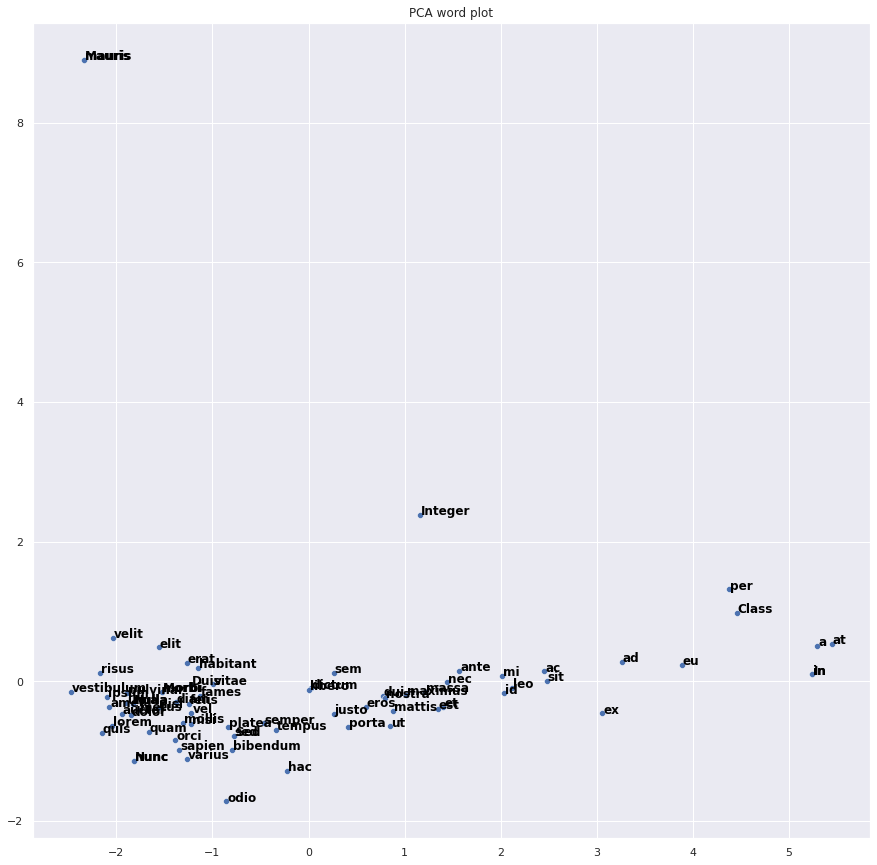

In [73]:
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
from nltk.tokenize import wordpunct_tokenize
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns


def get_word_vec(word):
    vec = None
    try:
        vec = model[word]
    except Exception as e:
        pass

    return vec


with open("lorem ipsum.txt", "r") as corpus_file:
    corpus = corpus_file.read()

    # tokenize words
    tokenized_words = [word for word in wordpunct_tokenize(
        corpus) if word.isalnum()]
    # index to word list
    word_list = list(dict.fromkeys(tokenized_words))

    # vectorize found words
    X = [get_word_vec(word.lower()) for word in word_list]

    # get all words that the pretrained model already has a vector for
    found_words = [word_vec is not None for word_vec in X]

    # get only found entries in X_reduced
    X_r = np.array(X, dtype=object)[found_words]
    # index to word list reduced
    word_list_r = np.array(word_list, dtype=object)[found_words]

    # fix list of arrays to 2D array
    X_r = np.stack(X_r, axis=0)

    # vizualize vectors in 2D
    pca = PCA()
    X_embedded = pca.fit_transform(X_r)

    # sns settings
    sns.set(rc={'figure.figsize': (15, 15)})

    # colors
    palette = sns.color_palette("bright", 1)

    # plot
    plt1 = sns.scatterplot(
        x=X_embedded[:, 0], y=X_embedded[:, 1], palette=palette)
    # Add text besides each point
    for ind in range(0, word_list_r.shape[0]):
        plt1.text(X_embedded[:, 0][ind]+0.01, X_embedded[:, 1][ind],
                  word_list_r[ind], horizontalalignment='left',
                  size='medium', color='black', weight='semibold')

    plt.title('PCA word plot')
    plt.savefig("pca_word_plot.png")
    plt.show()


In [19]:
an_array = np.empty((2, 2))

print(an_array)

np.append(an_array, [[1., 2.]], axis=0)

[[4.67096589e-310 0.00000000e+000]
 [4.34777768e-321 2.42092166e-322]]


array([[4.67096589e-310, 0.00000000e+000],
       [4.34777768e-321, 2.42092166e-322],
       [1.00000000e+000, 2.00000000e+000]])